In [45]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
a=pd.read_csv('data/fashion-mnist_train.csv').as_matrix()
b=pd.read_csv('data/fashion-mnist_test.csv').as_matrix()

C:\Users\Avinash.Singh26\AppData\Local\Continuum\miniconda3\envs\pacman\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Avinash.Singh26\AppData\Local\Continuum\miniconda3\envs\pacman\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [33]:
(train_Y,train_X)=a[:,0],a[:,1:]
(test_Y,test_X)=b[:,0],b[:,1:]

In [93]:

test_Y.shape,test_X.shape

((10000,), (10000, 784))

In [34]:
print(test_X.shape)

(10000, 784)


In [35]:
train_X=np.reshape(train_X,(60000,28,28))
test_X=np.reshape(test_X,(10000 ,28,28))

In [56]:
print("Training data shape: ",train_X.shape, train_Y.shape)
print("Testing data shape: ",test_X.shape, test_Y.shape)

Training data shape:  (60000, 28, 28, 1) (60000,)
Testing data shape:  (60000, 28, 28, 1) (10000,)


Display number of unique classes

In [43]:
classes=np.unique(train_Y)
nClasses=len(classes)
print("Total number of outputs : ",nClasses)
print("Output Classes : ",classes)

Total number of outputs :  10
Output Classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : 0')

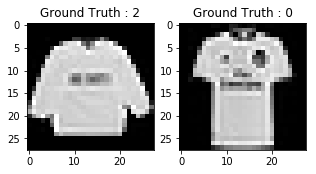

In [52]:
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(train_X[0,:,:],cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))
plt.subplot(122)
plt.imshow(test_X[0,:,:],cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocessing

In [55]:
train_X=train_X.reshape(-1,28,28,1)
test_X=test_X.reshape(-1,28,28,1)
train_X.shape,test_X.shape

((60000, 28, 28, 1), (60000, 28, 28, 1))

In [57]:
train_X=train_X.astype('float32')
test_X=test_X.astype('float32')
train_X=train_X/255.
test_X=test_X/255.

In [94]:
#test_X=test_X/255.

In [67]:
#One Hot Encodsing

train_Y_one_hot=to_categorical(train_Y)
test_Y_one_hot=to_categorical(test_Y)
print('Original label: ',train_Y[2])
print('After One hot Conversion: ',train_Y_one_hot[2])

Original label:  6
After One hot Conversion:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [98]:
#test_X=test_X.reshape(-1,28,28,1)
#test_X.shape,test_Y_one_hot.shape

((10000, 28, 28, 1), (10000, 10))

In [65]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label=train_test_split(train_X,train_Y_one_hot,test_size=0.2,random_state=13)

In [69]:
#Now the data is split between train and test part
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

# Model the data

In [76]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [77]:
batch_size=64
epochs=20
num_classes=10

In [88]:
fashion_model=Sequential()
fashion_model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128,activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes,activation='softmax'))

In [89]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [90]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 128)         73856     
__________

In [91]:
fashion_train=fashion_model.fit(train_X,train_label,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=
                                (valid_X,valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 190s 4ms/step - loss: 0.4740 - acc: 0.8266 - val_loss: 0.3449 - val_acc: 0.8708
Epoch 2/20
48000/48000 [==============================] - 169s 4ms/step - loss: 0.2973 - acc: 0.8926 - val_loss: 0.2865 - val_acc: 0.8916
Epoch 3/20
48000/48000 [==============================] - 184s 4ms/step - loss: 0.2466 - acc: 0.9093 - val_loss: 0.2644 - val_acc: 0.9040
Epoch 4/20
48000/48000 [==============================] - 184s 4ms/step - loss: 0.2157 - acc: 0.9208 - val_loss: 0.2505 - val_acc: 0.9093
Epoch 5/20
48000/48000 [==============================] - 194s 4ms/step - loss: 0.1888 - acc: 0.9313 - val_loss: 0.2356 - val_acc: 0.9138
Epoch 6/20
48000/48000 [==============================] - 191s 4ms/step - loss: 0.1644 - acc: 0.9403 - val_loss: 0.2337 - val_acc: 0.9177
Epoch 7/20
48000/48000 [==============================] - 185s 4ms/step - loss: 0.1422 - acc: 0.9472 - val_loss: 0.2455 - 

# MODEL EVALUATION ON THE TEST SET

In [99]:
test_eval=fashion_model.evaluate(test_X,test_Y_one_hot,verbose=0)

In [100]:
print("Test Loss : ",test_eval[0])
print("Test Accuracy : ",test_eval[1])

Test Loss :  0.40719987354278564
Test Accuracy :  0.9228


# Predicted Labels

In [101]:
predicted_classes=fashion_model.predict(test_X)

In [104]:
predicted_classes=np.argmax(np.round(predicted_classes),axis=1)

In [106]:
print(predicted_classes.shape,test_Y.shape)

(10000,) (10000,)


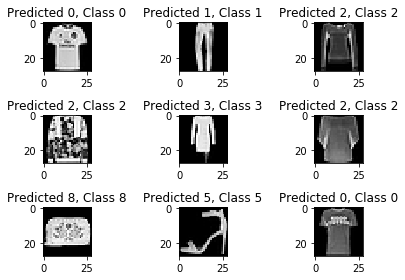

In [110]:
correct = np.where(predicted_classes==test_Y)[0]
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()